<a href="https://colab.research.google.com/github/githubotoro/ecological-mining-on-ethereum/blob/main/Ecological_Mining_on_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Ecological Mining on Ethereum**
## **Group Members:**


> ✅ **Riyank Makwana** 


> ✅ **Saumya Patel**


> ✅ **Uday Khokhariya**

# **Dataset: "On-Chain Ethereum Block Dataset"**









# Importing useful Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# Importing the Dataset

In [ ]:
trainDataset = pd.read_csv('/content/trainData1000.csv')
testDataset = pd.read_csv('/content/testData200.csv')

# Peeking into the Datasets

In [ ]:
print(trainDataset.head(), testDataset.head(), sep='\n\n')

    Size    Difficulty  TransactionCnt   AvgGasPrice  TransactionFee
0  32484  3.570000e+15             169  1.200000e+11    1.540000e+18
1  37775  3.620000e+15             150  2.718454e+10    3.090000e+17
2  49928  4.160000e+15             234  7.193481e+10    8.860000e+17
3  45086  5.240000e+15             148  2.380000e+11    2.910000e+18
4  50543  4.230000e+15             184  7.075986e+10    8.710000e+17

    Size    Difficulty  TransactionCnt   AvgGasPrice  TransactionFee
0  44900  4.430000e+15             251  1.590000e+11    1.930000e+18
1  48607  5.310000e+15             282  7.515595e+10    1.290000e+18
2  53762  3.870000e+15             330  1.030000e+11    1.270000e+18
3  49324  3.630000e+15             296  3.825000e+10    5.700000e+17
4  41334  4.660000e+15             177  2.600000e+11    3.060000e+18


# Architecture of the Datasets

In [ ]:
print(f'Train Dataset contains: {len(trainDataset)} rows x {len(trainDataset.columns)} columns -> Total of {trainDataset.size} data points')
print(f'Test Dataset contains: {len(testDataset)} rows x {len(testDataset.columns)} columns -> Total of {testDataset.size} data points')

Train Dataset contains: 1000 rows x 5 columns -> Total of 5000 data points
Test Dataset contains: 200 rows x 5 columns -> Total of 1000 data points


# Renaming the Columns

In [ ]:
trainDataset.rename(columns={'Difficulty': 'Diff', 'TransactionCnt': 'TxCnt', 'TransactionFee': 'TxFee'}, inplace=True)
testDataset.rename(columns={'Difficulty': 'Diff', 'TransactionCnt': 'TxCnt', 'TransactionFee': 'TxFee'}, inplace=True)
trainDataset.head()

,Size,Diff,TxCnt,AvgGasPrice,TxFee
0,32484,3.570000e+15,169,1.200000e+11,1.540000e+18
1,37775,3.620000e+15,150,2.718454e+10,3.090000e+17
2,49928,4.160000e+15,234,7.193481e+10,8.860000e+17
3,45086,5.240000e+15,148,2.380000e+11,2.910000e+18
4,50543,4.230000e+15,184,7.075986e+10,8.710000e+17


# Summary of Train Dataset

In [ ]:
print(trainDataset.describe())
print(trainDataset.info())

                Size          Diff        TxCnt   AvgGasPrice         TxFee
count    1000.000000  1.000000e+03  1000.000000  1.000000e+03  1.000000e+03
mean    42556.257000  3.985350e+15   183.634000  1.035642e+11  1.235122e+18
std     10360.492813  6.946317e+14    57.003188  9.255626e+10  1.067197e+18
min      5873.000000  3.160000e+15    23.000000  7.552393e+09  1.080000e+17
25%     37283.750000  3.420000e+15   147.000000  4.661885e+10  5.477500e+17
50%     42936.000000  3.670000e+15   180.000000  7.649466e+10  9.135000e+17
75%     47970.750000  4.542500e+15   220.000000  1.330000e+11  1.600000e+18
max    118136.000000  5.690000e+15   570.000000  8.960000e+11  1.050000e+19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         1000 non-null   int64  
 1   Diff         1000 non-null   float64
 2   TxCnt        1000 non-null   int64  
 

# Converting Values to Float

In [ ]:
def conversionToFloat(dataset):
  for i in dataset.columns:
    dataset[i] = dataset[i].astype('float')

conversionToFloat(trainDataset)
conversionToFloat(testDataset)
trainDataset.head()

,Size,Diff,TxCnt,AvgGasPrice,TxFee
0,32484.0,3.570000e+15,169.0,1.200000e+11,1.540000e+18
1,37775.0,3.620000e+15,150.0,2.718454e+10,3.090000e+17
2,49928.0,4.160000e+15,234.0,7.193481e+10,8.860000e+17
3,45086.0,5.240000e+15,148.0,2.380000e+11,2.910000e+18
4,50543.0,4.230000e+15,184.0,7.075986e+10,8.710000e+17


# Finding Min, Max of each column

In [ ]:
def getStats(dataset):
  descriptionOfDataSet = dataset.describe()
  mean, min, max = {}, {}, {}
  for i in dataset.columns:
    min[i] = descriptionOfDataSet[i]['min']
    max[i] = descriptionOfDataSet[i]['max']
  return min, max
min, max = getStats(trainDataset)
print(f'min: {min}', f'max: {max}', sep='\n')

min: {'Size': 5873.0, 'Diff': 3160000000000000.0, 'TxCnt': 23.0, 'AvgGasPrice': 7552392549.0, 'TxFee': 1.08e+17}
max: {'Size': 118136.0, 'Diff': 5690000000000000.0, 'TxCnt': 570.0, 'AvgGasPrice': 896000000000.0, 'TxFee': 1.05e+19}


# Scaling all values of each column by below formula
## Min-Max Scaler
### `newValue = (oldValue - minValue) / (maxValue - minValue)`

In [ ]:
def transformByMinMax(dataset, min, max):
  numberOfRows = len(dataset)
  for i in dataset.columns:
    rangeOfValue = max[i] - min[i]
    for j in range(numberOfRows):
      dataset[i][j] = (dataset[i][j] - min[i]) / rangeOfValue
transformByMinMax(trainDataset, min, max)
transformByMinMax(testDataset, min, max)
trainDataset.head()

,Size,Diff,TxCnt,AvgGasPrice,TxFee
0,0.237042,0.162055,0.266910,0.126566,0.137798
1,0.284172,0.181818,0.232176,0.022097,0.019342
2,0.392427,0.395257,0.385740,0.072466,0.074865
3,0.349296,0.822134,0.228519,0.259382,0.269630
4,0.397905,0.422925,0.294333,0.071144,0.073422


# Pair Plot to gather the insights related to the relation between the variables

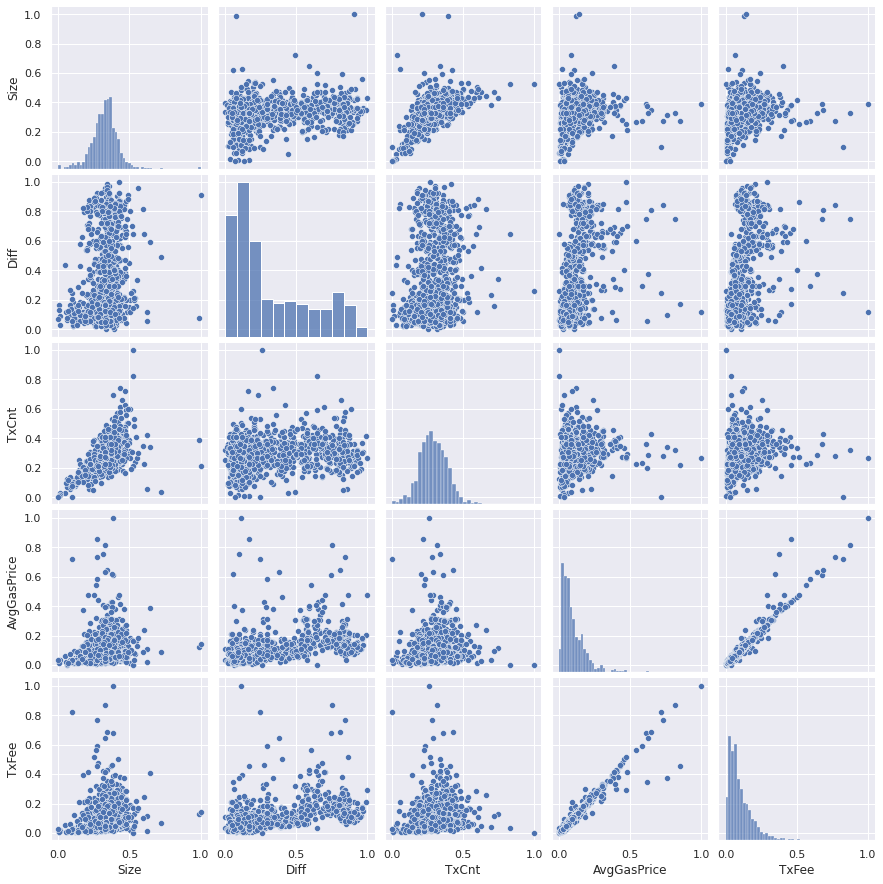

In [ ]:
sns.pairplot(trainDataset)
plt.show()

# Pearson Coefficient to quantify the coorelation between the variables

In [ ]:
trainDataset.corr()

,Size,Diff,TxCnt,AvgGasPrice,TxFee
Size,1.000000,0.227056,0.591936,0.177064,0.199768
Diff,0.227056,1.000000,0.107982,0.458336,0.495916
TxCnt,0.591936,0.107982,1.000000,0.120765,0.160969
AvgGasPrice,0.177064,0.458336,0.120765,1.000000,0.970922
TxFee,0.199768,0.495916,0.160969,0.970922,1.000000


# Making an Equation (Speculating the Trend)

## Size v/s TxFee
### `TxFee ∝ Size^2`

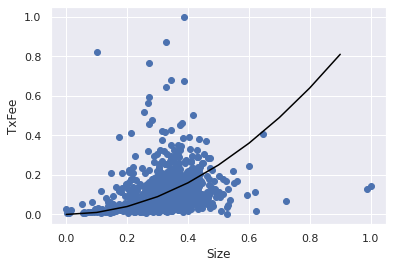

In [ ]:
plt.scatter(trainDataset['Size'], trainDataset['TxFee'])
plt.plot(np.arange(0,1,0.1), np.arange(0,1, 0.1)**2, color='black')
plt.xlabel('Size')
plt.ylabel('TxFee')
plt.show()

## Diff v/s TxFee
### `TxFee ∝ Diff`

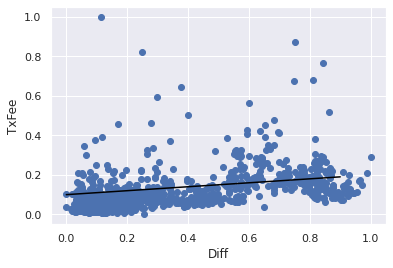

In [ ]:
plt.scatter(trainDataset['Diff'], trainDataset['TxFee'])
plt.plot(np.arange(0,1,0.1), 0.1*np.arange(0,1, 0.1)+0.1, color='black')
plt.xlabel('Diff')
plt.ylabel('TxFee')
plt.show()

## TxCnt v/s TxFee
### `TxFee ∝ TxCnt^2`

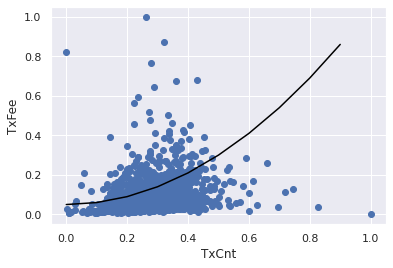

In [ ]:
plt.scatter(trainDataset['TxCnt'], trainDataset['TxFee'])
plt.plot(np.arange(0,1,0.1), np.arange(0,1, 0.1)**2+ 0.05, color='black')
plt.xlabel('TxCnt')
plt.ylabel('TxFee')
plt.show()

## AvgGasPrice v/s TxFee
### `TxFee ∝ AvgGasPrice`

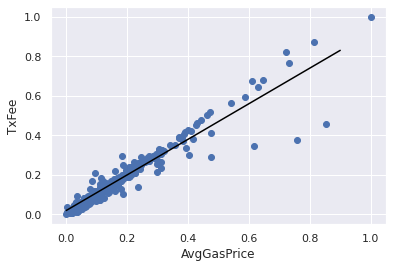

In [ ]:
plt.scatter(trainDataset['AvgGasPrice'], trainDataset['TxFee'])
plt.plot(np.arange(0,1,0.1), np.arange(0,1, 0.1)*0.9+ 0.02, color='black')
plt.xlabel('AvgGasPrice')
plt.ylabel('TxFee')
plt.show()

# Extracting Features (Explanatory / Regressor variables) & Output (Dependent) variable from the Dataset

In [ ]:
X_train = trainDataset.iloc[:, :-1].to_numpy()
Y_train = np.reshape(trainDataset.iloc[:,-1].to_numpy(),(-1,1))
X_test = testDataset.iloc[:, :-1].to_numpy()
Y_test = np.reshape(testDataset.iloc[:,-1].to_numpy(),(-1,1))
# X, Y

# Machine Learning 🤖 comes into Light

## ML Model
### **Multi Linear Regression**

In [ ]:
class MultiLinearRegression:

  def __init__(self):
    self.W = None

  def predict(self, X, W):
    return W[0]*(X[:,0]**2) + W[1]*(X[:,1]) + W[2]*(X[:,2]**2) + W[3]*(X[:,3]) + W[4]
  def loss(self, X, Y, W):
    Y_hat = self.predict(X, W)
    Y_diff = Y_hat - Y
    return np.sum(Y_diff ** 2) / X.shape[0]

  def accuracy(self, X, Y, W, *, thresholdValue):
    N = len(X)
    correct_results = 0
    Y_hat = self.predict(X,W)
    passed_or_failed = []
    for i in range(N):
      if abs(Y_hat[i]-Y[i]) <= abs(thresholdValue):
        correct_results += 1
        passed_or_failed.append(True)
      else:
        passed_or_failed.append(False)
    return round(correct_results * 100, 3) / N, correct_results, passed_or_failed

  def transform(self, W, b):
    W = np.hstack((W, b))
    return W

  def surfaceGradient(self, X, Y, W):
    N = len(X)
    Y_hat = self.predict(X, W)
    Y_diff = Y_hat - Y
    grad_w0 = 2*np.sum(Y_diff*(X[:,0]**2)) / N # Dloss_DW0 
    grad_w1 = 2*np.sum(Y_diff*(X[:,1])) / N
    grad_w2 = 2*np.sum(Y_diff*(X[:,2]**2)) / N
    grad_w3 = 2*np.sum(Y_diff*(X[:,3])) / N
    grad_w4 = 2*np.sum(Y_diff) / N
    return np.array([grad_w0, grad_w1, grad_w2, grad_w3, grad_w4])

  def predictFromOutside(self, min, max, X, *, outputVariableName):
    X_transformed, prediction = [], []
    if type(X[0]) == dict:
      for i in X:
        X_transformed.append([0,0,0,0])
        idx = None
        for j in i:
          if j == 'AvgGasPrice':
            idx = 3
          elif j == 'TxCnt':
            idx = 2
          elif j == 'Diff':
            idx = 1
          elif j == 'Size':
            idx = 0
          X_transformed[-1][idx] = (i[j]-min[j])/(max[j]-min[j])
      prediction = self.predict(np.array(X_transformed), self.W)
    else:
      prediction = self.predict(np.array(X), self.W)
    final_output = []
    for i in prediction:
      final_output.append([])
      final_output[-1].append(i*(max[outputVariableName]-min[outputVariableName])+min[outputVariableName])
    return final_output

  def train(self, X, Y, *, epochs, batch_size, lr, W, b):
    W = self.transform(W, b)
    N = len(X)
    isFirstIteration = False
    previous_grad = []
    loss_values, w_values, w_grads, w_lrs  = [], [], [], []
    try:
      for i in range(epochs):
        for j in range(math.ceil(N/batch_size)):
          X_batch = X[j*batch_size:(j+1)*batch_size] if (j+1)*batch_size <= N else X[j*batch_size]
          Y_batch = Y[j*batch_size:(j+1)*batch_size] if (j+1)*batch_size <= N else Y[j*batch_size]

          grad_W = self.surfaceGradient(X_batch, Y_batch, W)
          current_loss = self.loss(X,Y,W)
          if not isFirstIteration:
            print(f'Initial Avg Loss: {round(current_loss, 3)}')
            isFirstIteration = True
          loss_values.append(current_loss)
          w_grads.append(grad_W)
          w_values.append(W)
          w_lrs.append(lr)
          if len(previous_grad) != 0:
            for k in range(len(lr)):
              if previous_grad[k] / grad_W[k] < 0:
                lr[k] /= 2
          W -= lr * grad_W
          previous_grad = grad_W
      current_loss = self.loss(X, Y, W)
      loss_values.append(current_loss)
      w_values.append(W)
      w_lrs.append(lr)
      self.W = W
    except:
      self.W = W
      return self.W, lr, loss_values, w_values, w_grads, w_lrs
    return self.W, lr, loss_values, np.array(w_values), np.array(w_grads), np.array(w_lrs)


## Instantiating ML model

In [ ]:
multiLinearRegression = MultiLinearRegression()

## Initializing the HyperParameters & Parameters
### `TxFee = w1 * Size^2 + w2 * Diff + w3 * TxCnt^2 + w4 * AvgGasPrice + bias`

In [ ]:
weights_initial, bias_initial, lr_initial = np.array([0.5, 0.5, 0.5, 0.5]), 0.5, np.array([0.01,0.01,0.01,0.01,0.01])
epochs, batch_size = 1500, 50
print(f'Size of Dataset: {len(X_train)}')
print(f'Number of Epochs: {epochs}')
print(f'Batch Size: {batch_size}')
print(f'Initial Learning Rates (lr): {lr_initial}')
print(f'Initial Equation: TxFee = {round(weights_initial[0], 3)} * Size^2 + {round(weights_initial[1], 3)} * Difficulty + {round(weights_initial[2], 3)} * TxCnt^2 + {round(weights_initial[3], 3)} * AvgGasPrice + {round(bias_initial, 3)}')

Size of Dataset: 1000
Number of Epochs: 1500
Batch Size: 50
Initial Learning Rates (lr): [0.01 0.01 0.01 0.01 0.01]
Initial Equation: TxFee = 0.5 * Size^2 + 0.5 * Difficulty + 0.5 * TxCnt^2 + 0.5 * AvgGasPrice + 0.5


## Training the Model
### `TxFee = w1 * Size^2 + w2 * Diff + w3 * TxCnt^2 + w4 * AvgGasPrice + bias`

In [ ]:
weights_final, lr_final, loss_values, w_values, w_grads, w_lrs = multiLinearRegression.train(X_train, Y_train, epochs=epochs, batch_size=batch_size, lr=lr_initial, W=weights_initial, b=bias_initial)
loss_final = multiLinearRegression.loss(X_train, Y_train, weights_final)
print(f'Final Learning Rates (lr): {lr_final}')
print(f'Final Avg Loss: {round(loss_final,2)}')
print(f'Final Equation: TxFee = {round(weights_final[0], 3)} * Size^2 + {round(weights_final[1], 3)} * Difficulty + {round(weights_final[2], 3)} * TxCnt^2 + {round(weights_final[3], 3)} * AvgGasPrice + {round(weights_final[4], 3)}')

Initial Avg Loss: 556.857
Final Learning Rates (lr): [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.10351563e-07
 0.00000000e+00]
Final Avg Loss: 16.9
Final Equation: TxFee = 0.417 * Size^2 + 0.122 * Difficulty + 0.429 * TxCnt^2 + 0.24 * AvgGasPrice + -0.067


## Threshold Value for Accuracy of Model on Training Data

In [ ]:
thresholdValueTrain = 0.07
print(f'Threshold is set to {round(thresholdValueTrain, 3)}')

Threshold is set to 0.07


## Accuracy of Model on Training Data

In [ ]:
accuracy, correct_results, passed_or_failed = multiLinearRegression.accuracy(X_train, Y_train, weights_final, thresholdValue=thresholdValueTrain)
print(f'Correct results: {correct_results} / {len(X_train)}')
print(f'Accuracy: {accuracy} %')
print(f'Passed or Failed: {passed_or_failed}')

Correct results: 817 / 1000
Accuracy: 81.7 %
Passed or Failed: [False, True, True, False, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

## Threshold Value for Accuracy of Model on Testing Data

In [ ]:
thresholdValueTest = 0.07
print(f'Threshold is set to {round(thresholdValueTest, 3)}')

Threshold is set to 0.07


## Testing the Model

In [ ]:
accuracy, correct_results, passed_or_failed = multiLinearRegression.accuracy(X_test, Y_test, weights_final, thresholdValue=thresholdValueTest)
print(f'Correct results: {correct_results} / {len(X_test)}')
print(f'Accuracy: {accuracy} %')
print(f'Passed or Failed: {passed_or_failed}')
outputs = multiLinearRegression.predictFromOutside(min, max, X_test, outputVariableName='TxFee')
outputs

Correct results: 165 / 200
Accuracy: 82.5 %
Passed or Failed: [True, False, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True

[[1.768860429879525e+18],
 [2.3023404514760586e+18],
 [2.2253794641980977e+18],
 [1.490883742686917e+18],
 [1.6553264605385812e+18],
 [-1.8637235432878544e+16],
 [2.53209227324273e+18],
 [1.6201809390776413e+17],
 [1.3497384283136865e+18],
 [-4.050962951689039e+17],
 [4.037323095233206e+17],
 [-5.005793915764458e+16],
 [6.545638739353455e+17],
 [5.294009683785184e+17],
 [8.760289044313884e+17],
 [1.0859456324044588e+18],
 [-1.312045228662406e+17],
 [9.457521020643616e+17],
 [7.057216473590363e+17],
 [6.07053750817107e+17],
 [1.6936133327290135e+18],
 [9.818440951803662e+17],
 [2.0559780639836398e+18],
 [4.177021836629044e+17],
 [1.4511568350105372e+18],
 [4.545438564543403e+17],
 [3.342327544584854e+17],
 [2.0121839610349245e+18],
 [2.590512480455813e+18],
 [2.7592852550734755e+17],
 [8.297361997317492e+17],
 [2.898474439213528e+17],
 [8.850795950569738e+17],
 [1.644747398073702e+18],
 [2.2507351782040049e+18],
 [1.595654100028229e+18],
 [9.062646121401312e+17],
 [3.043911682840553e+17

## Predicting the Output from the User-Defined Inputs

In [ ]:
inputs = [{
    'Size': 10000.0,
    'Diff': 3510013500000000.0,
    'TxCnt': 117.0,
    'AvgGasPrice': 789001070000.0
}, {
    'Size': 70413.0,
    'Diff': 5170012400000000.0,
    'TxCnt': 107.0,
    'AvgGasPrice': 789135620000.0
}, {
    'Size': 98932.0,
    'Diff': 4672013500086470.0,
    'TxCnt': 379.0,
    'AvgGasPrice': 823911294000.0
}]

outputs = multiLinearRegression.predictFromOutside(min, max, inputs, outputVariableName='TxFee')
outputs

[[1.917530669674259e+18], [4.146299596018587e+18], [7.320170196775355e+18]]